IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Ilyes DJERFAF\
Anyes TAFOUGHALT

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [3]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [4]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [5]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [6]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [7]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [8]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [9]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# <font size="+5" color="RED"><b>Titre : Analyse de l'Impact Environnemental des Emballages dans l'Industrie Agroalimentaire</b></font> 

## Introduction :

L'industrie agroalimentaire joue un rôle crucial dans notre société en fournissant les produits alimentaires dont nous avons besoin pour notre alimentation quotidienne. Cependant, cette industrie est également confrontée à des défis majeurs en matière de durabilité environnementale. L'emballage des produits alimentaires, par exemple, est devenu une préoccupation majeure en raison de son impact sur l'environnement.

Dans le cadre de ce projet, **notre objectif** est **d'explorer et d'analyser l'impact environnemental des différents types d'emballage utilisés dans l'industrie agroalimentaire**. Nous allons nous concentrer sur les données fournies par le jeu de données "**AGRIBALYSE3-synthese.csv**", qui contient des informations détaillées sur les produits alimentaires et leurs caractéristiques environnementales.

L'analyse se concentrera principalement sur la colonne "Matériau d'emballage" qui répertorie les types d'emballage utilisés pour chaque produit alimentaire. Nous allons utiliser des techniques de clustering, telles que l'algorithme K-moyennes et le clustering hiérarchique, pour regrouper les produits alimentaires en fonction de leurs types d'emballage similaires. Cela nous permettra d'identifier les tendances et les relations entre le type d'emballage et l'impact environnemental des aliments.

En réalisant cette analyse, nous espérons découvrir des informations précieuses sur les matériaux d'emballage les plus couramment utilisés dans l'industrie agroalimentaire, ainsi que leur impact environnemental relatif. Ces connaissances pourraient être utilisées pour informer les décisions de conception d'emballage plus durables et pour promouvoir des pratiques plus respectueuses de l'environnement dans cette industrie cruciale.

## Etape 1 : Acquisition des données

In [16]:
dataframe = pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")
dataframe.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


## Etape 2 : Visualisation des données

### Diagramme en barres pour les groupes d'aliments :

- Nous avons utilisé un diagramme en barres pour visualiser la répartition des différents groupes d'aliments.
Ce type de graphique est approprié pour représenter des catégories discrètes (les groupes d'aliments) avec leur fréquence respective.
- L'axe des x représente les groupes d'aliments, tandis que l'axe des y représente le nombre d'occurrences de chaque groupe.
- La rotation des étiquettes sur l'axe des x est effectuée pour éviter les chevauchements lorsque les étiquettes sont longues.

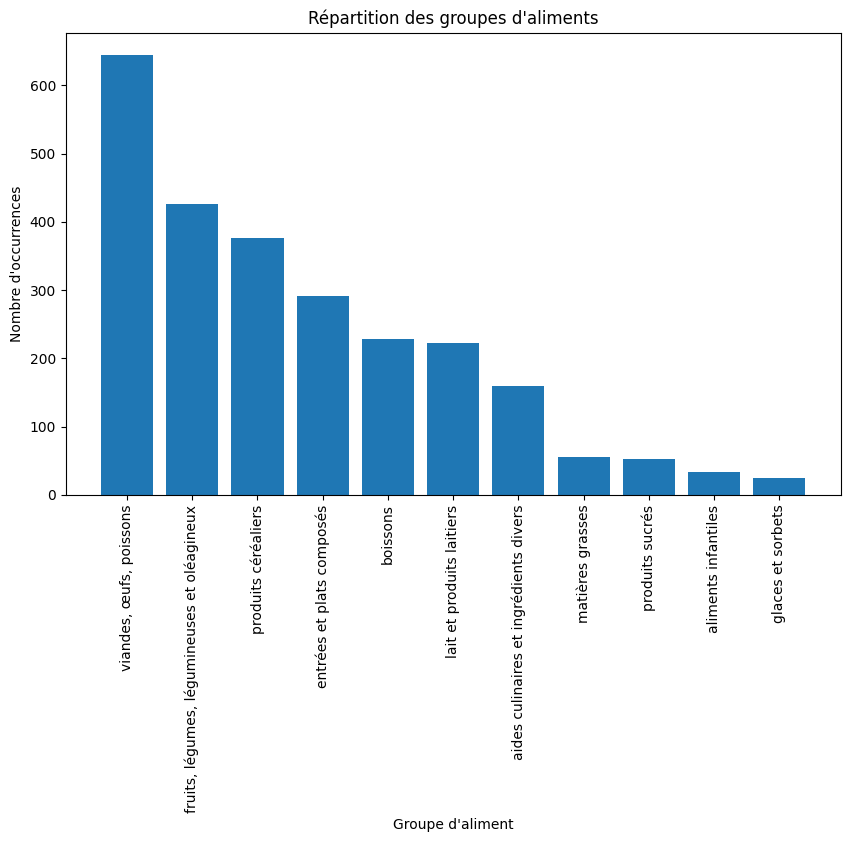

In [10]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque groupe d'aliments
groupes_aliments = dataframe['Groupe d\'aliment'].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(groupes_aliments.index, groupes_aliments.values)
plt.xlabel('Groupe d\'aliment')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des groupes d\'aliments')
plt.xticks(rotation=90)
plt.show()


### Diagramme circulaire pour les sous-groupes d'aliments :

- Nous avons utilisé un diagramme circulaire pour visualiser la répartition des sous-groupes d'aliments.
- Ce type de graphique est approprié pour représenter des proportions relatives (pourcentages) de différentes catégories (sous-groupes d'aliments) dans un ensemble.
- Chaque tranche du diagramme représente un sous-groupe d'aliments, et sa taille est proportionnelle à sa fréquence dans les données.

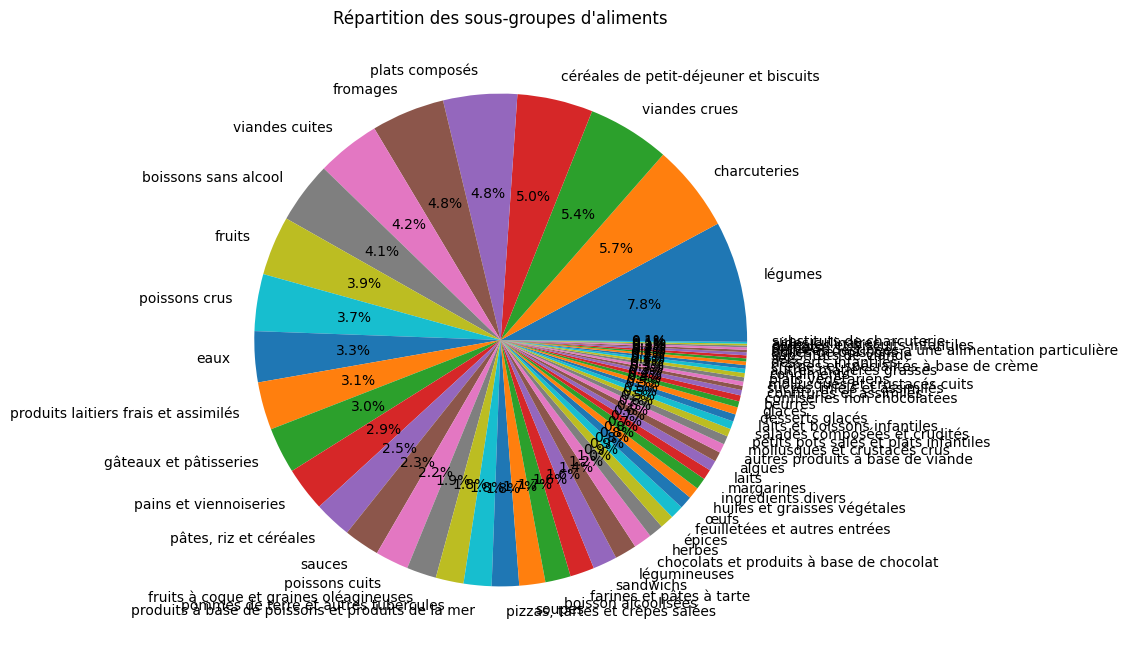

In [11]:
# Compter le nombre d'occurrences de chaque sous-groupe d'aliments
sous_groupes_aliments = dataframe['Sous-groupe d\'aliment'].value_counts()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sous_groupes_aliments.values,
        labels=sous_groupes_aliments.index, autopct='%1.1f%%')
plt.title('Répartition des sous-groupes d\'aliments')
plt.show()


### Diagramme à barres pour l'impact environnemental moyen de chaque colonne :

- Nous avons utilisé un diagramme à barres pour visualiser la moyenne de l'impact environnemental pour chaque colonne.
Ce type de graphique est approprié pour comparer les valeurs moyennes entre différentes catégories (dans ce cas, les différentes colonnes d'impact environnemental).
- L'axe des x représente les colonnes d'impact environnemental, tandis que l'axe des y représente la moyenne de l'impact environnemental pour chaque colonne.
- Les étiquettes sur l'axe des x sont tournées à 90 degrés pour éviter les chevauchements lorsque les étiquettes sont longues.

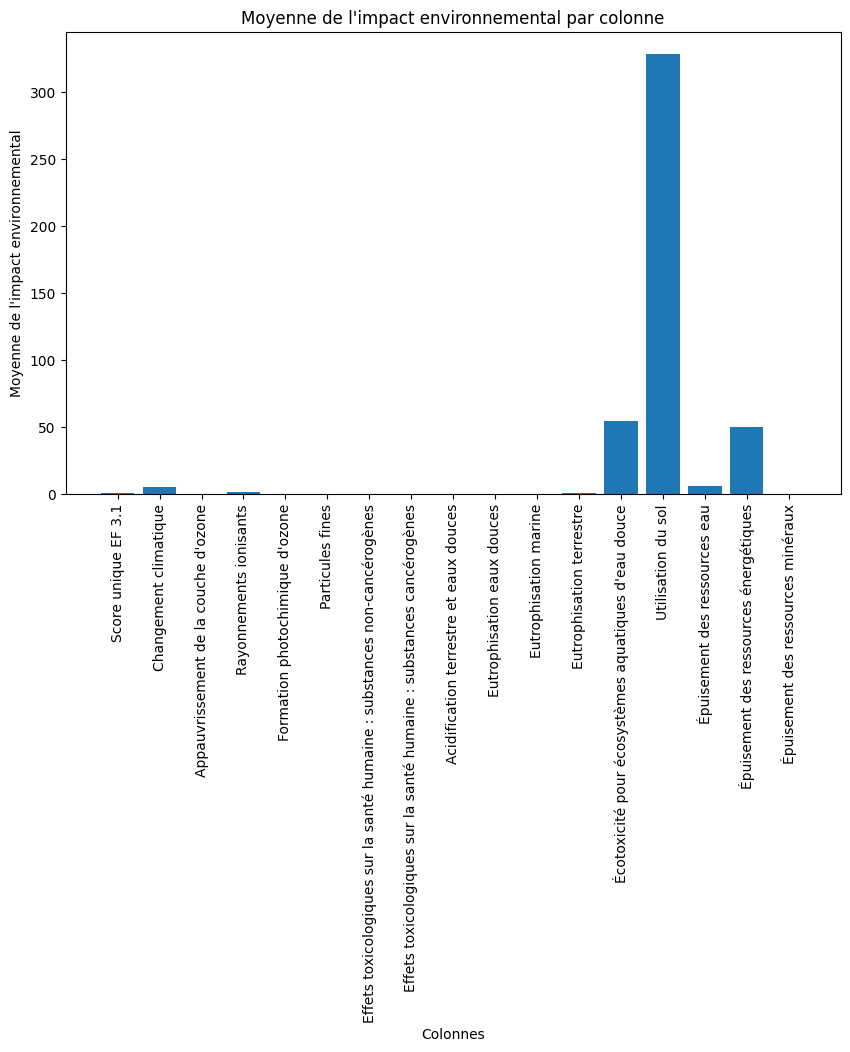

In [12]:
# Calculer la moyenne de l'impact environnemental pour chaque colonne à partir de la 12ème colonne
impact_env_mean = dataframe.iloc[:, 12:].mean()

# Tracer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(range(12, len(dataframe.columns)), impact_env_mean)
plt.xlabel('Colonnes')
plt.ylabel('Moyenne de l\'impact environnemental')
plt.title('Moyenne de l\'impact environnemental par colonne')
plt.xticks(range(12, len(dataframe.columns)),
           dataframe.columns[12:], rotation=90)
plt.show()


## Etape 3 : Pre-traitement de données

### 3.1 Supprimer les colonnes non pertinentes

In [13]:
dataframe.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

In [14]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français',
                        'LCI Name', 'code saison', 'code avion', 'Livraison', 'Préparation']

# Supprimer les colonnes du DataFrame
dataframe = dataframe.drop(colonnes_a_supprimer, axis=1)


### 3.2 Gérer les valeurs manquantes

In [15]:
# Vérifier s'il existe des valeurs manquantes
if dataframe.isnull().values.any():
    # Supprimer les lignes contenant des valeurs manquantes
    dataframe = dataframe.dropna()
    # Remplacer les valeurs manquantes par la moyenne de la colonne
    dataframe = dataframe.fillna(dataframe.mean())


### 3.3 Encodage des variables catégorielles


Lorsque nous travaillons avec des données contenant des variables catégorielles, il est souvent nécessaire de les encoder numériquement avant d'appliquer certains algorithmes d'apprentissage automatique ou de traitement des données. Dans cette étape, nous allons expliquer pourquoi l'encodage est important, ce qu'est un encoding et à quoi cela sert.

#### Pourquoi effectuer un encodage ?
Les algorithmes d'apprentissage automatique et de traitement des données utilisent généralement des calculs mathématiques pour effectuer leurs opérations. Cependant, ces algorithmes ne peuvent pas traiter directement les variables catégorielles, telles que des chaînes de caractères représentant des catégories ou des étiquettes. Par conséquent, il est nécessaire de convertir ces variables en une forme numérique compréhensible par les algorithmes.

#### Qu'est-ce qu'un encoding ?
L'encodage consiste à convertir des variables catégorielles en valeurs numériques, de manière à préserver la signification des catégories tout en permettant leur manipulation mathématique. Il existe différentes techniques d'encodage, telles que l'encodage binaire, l'encodage ordinal et l'encodage one-hot.

- L'encodage binaire assigne un nombre binaire unique à chaque catégorie, ce qui permet de représenter chaque catégorie par une séquence de 0 et de 1.
- L'encodage ordinal attribue des entiers à chaque catégorie en fonction de leur ordre ou de leur importance.
- L'encodage one-hot crée de nouvelles variables binaires pour chaque catégorie, où chaque variable indique la présence ou l'absence de la catégorie.
#### À quoi sert l'encodage ?
L'encodage des variables catégorielles permet de rendre les données utilisables par les algorithmes d'apprentissage automatique et de traitement des données. En convertissant les variables catégorielles en valeurs numériques, nous permettons aux algorithmes de calculer des mesures de similarité, de détection de motifs et de prédiction sur ces variables. Cela facilite également l'application d'autres techniques statistiques et de visualisation des données.

En somme, l'encodage des variables catégorielles est une étape essentielle du prétraitement des données qui permet de rendre les données utilisables et d'exploiter pleinement leur potentiel dans les analyses et les modèles prédictifs.

In [16]:
dataframe.columns


Index(['Groupe d'aliment', 'Sous-groupe d'aliment', 'Matériau d'emballage',
       'DQR', 'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

In [17]:
# Vérifier le type de données de chaque colonne
print(dataframe.dtypes)


Groupe d'aliment                                                             object
Sous-groupe d'aliment                                                        object
Matériau d'emballage                                                         object
DQR                                                                         float64
Score unique EF 3.1                                                         float64
Changement climatique                                                       float64
Appauvrissement de la couche d'ozone                                        float64
Rayonnements ionisants                                                      float64
Formation photochimique d'ozone                                             float64
Particules fines                                                            float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes    float64
Effets toxicologiques sur la santé humaine : substances cancérogènes        

In [19]:
dataframe = dataframe.rename(columns={"Groupe d'aliment": 'groupe', "Sous-groupe d'aliment": 'sous-groupe', "Matériau d'emballage": 'mat-emballage'})

**L'étiquetage (label encoding)** est une technique de transformation des variables catégorielles en valeurs numériques. Il consiste à attribuer des étiquettes numériques uniques à chaque catégorie de la variable. Cela permet de représenter les catégories sous forme de nombres afin de les utiliser dans les algorithmes d'apprentissage automatique.

L'étiquetage est souvent utilisé lorsque les catégories d'une variable ont un ordre ou une relation hiérarchique naturelle. Par exemple, les tailles de vêtements (petit, moyen, grand) peuvent être étiquetées comme 0, 1 et 2 respectivement, car elles ont une relation d'ordre.

Voici un exemple simple pour illustrer l'étiquetage :

| Catégorie | Etiquette |
|-------|------|
|   Pomme  |  0   |
|   Banane   |  1   |
|   Orange   |  2   |
|   Fraise   |  3   |
|   Kiwi   |  4   |


Dans cet exemple, chaque catégorie de fruit a été étiquetée avec une valeur numérique unique. Ainsi, les fruits peuvent maintenant être représentés par leurs étiquettes numériques dans les calculs et les analyses.

L'étiquetage est utile car de nombreux algorithmes d'apprentissage automatique requièrent des variables numériques en entrée. En convertissant les variables catégorielles en étiquettes numériques, nous permettons à ces algorithmes de traiter ces variables et de trouver des modèles ou des relations dans les données.

Il est important de noter que l'étiquetage peut ne pas convenir à toutes les situations, en particulier lorsque les variables catégorielles ne présentent pas d'ordre ou de relation hiérarchique clairs. Dans de tels cas, d'autres techniques telles que l'encodage one-hot peuvent être plus appropriées.

En résumé, l'étiquetage est une technique permettant de convertir des variables catégorielles en valeurs numériques uniques. Cela facilite l'utilisation de ces variables dans les algorithmes d'apprentissage automatique et permet de découvrir des modèles dans les données.

In [56]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()
dataframe_encoded = dataframe.copy()
# Appliquer l'étiquetage aux colonnes 'groupe', 'sous-groupe' et 'mat-emballage'
dataframe_encoded['groupe'] = label_encoder.fit_transform(dataframe['groupe'])
dataframe_encoded['sous-groupe'] = label_encoder.fit_transform(
    dataframe['sous-groupe'])
dataframe_encoded['mat-emballage'] = label_encoder.fit_transform(
    dataframe['mat-emballage'])


In [57]:
dataframe_encoded

,groupe,sous-groupe,mat-emballage,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,0,1,7,2.99,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,0,26,16,4.11,0.1030,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,0,26,15,3.54,0.0638,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,0,26,7,3.75,0.1320,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,0,1,7,2.99,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,10,57,12,2.47,2.1800,22.400,7.120000e-07,1.870,0.04180,1.520000e-06,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,10,58,12,2.45,2.2600,23.600,7.740000e-07,1.680,0.04380,1.570000e-06,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,10,42,12,3.68,0.8160,4.250,7.760000e-07,0.425,0.06480,7.260000e-07,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,10,43,9,3.56,1.0300,5.160,9.570000e-07,1.120,0.07900,8.870000e-07,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


### 3.4 Normaliser les données

**La normalisation des données** est une étape importante dans l'analyse de données, en particulier lorsqu'il s'agit de techniques de clustering. La normalisation vise à mettre toutes les variables sur une échelle commune, ce qui permet de comparer et d'interpréter les données de manière équitable.

Voici quelques raisons pour lesquelles la normalisation est bénéfique :

**1. Élimination des biais de mise à l'échelle** : Lorsque les variables ont des échelles différentes, cela peut introduire des biais dans les algorithmes de clustering. La normalisation permet d'éliminer ces biais et de garantir que toutes les variables contribuent de manière équitable à la similarité entre les observations.

**2. Stabilité des algorithmes** : Certains algorithmes de clustering sont sensibles aux différences d'échelle entre les variables. En normalisant les données, vous réduisez l'influence de ces différences d'échelle et améliorez la stabilité des résultats.

**3. Comparaison des distances** : La normalisation permet de comparer les distances entre les observations de manière plus significative. Les distances basées sur des variables non normalisées peuvent être dominées par les variables à plus grande échelle, ce qui peut fausser les résultats du clustering.

**4. Interprétation des résultats** : En normalisant les données, vous facilitez l'interprétation des résultats du clustering. Les variables normalisées sont sur la même échelle, ce qui facilite la compréhension des contributions relatives de chaque variable au regroupement des observations.

En résumé, la normalisation des données est importante pour garantir des résultats de clustering cohérents et significatifs. Elle permet de mettre toutes les variables sur une échelle commune, d'éliminer les biais de mise à l'échelle et de faciliter l'interprétation des résultats.

In [63]:
# Liste des colonnes à normaliser
colonnes_normaliser = [colonne for colonne in dataframe_encoded.columns if colonne not in [
    'groupe', 'sous-groupe', 'mat-emballage']]

# Copie du DataFrame encodé
dataframe_normalized = dataframe_encoded.copy()

# Normalisation des colonnes
dataframe_normalized[colonnes_normaliser] = (dataframe_normalized[colonnes_normaliser] - dataframe_normalized[colonnes_normaliser].min()) / (
    dataframe_normalized[colonnes_normaliser].max() - dataframe_normalized[colonnes_normaliser].min())


In [65]:
dataframe_normalized


,groupe,sous-groupe,mat-emballage,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,0,1,7,0.487738,0.204297,0.129036,0.004186,0.364651,0.099467,0.114141,...,0.100901,0.107886,0.056806,0.019510,0.030932,0.040320,0.011833,0.052285,0.441695,0.067460
1,0,26,16,0.792916,0.015108,0.013604,0.000495,0.004872,0.007207,0.012371,...,0.006403,0.006222,0.003390,0.003141,0.002841,0.004730,0.010712,0.051128,0.015494,0.004639
2,0,26,15,0.637602,0.008528,0.006070,0.000213,0.003950,0.002437,0.002876,...,0.003763,0.001632,0.001673,0.002843,0.001263,0.003132,0.010409,0.052125,0.006373,0.002406
3,0,26,7,0.694823,0.019976,0.014869,0.000247,0.003885,0.006258,0.010206,...,0.008807,0.008277,0.005807,0.005720,0.007388,0.004592,0.013594,0.056655,0.015353,0.003228
4,0,1,7,0.487738,0.204297,0.129036,0.004186,0.364651,0.099467,0.114141,...,0.100901,0.107886,0.056806,0.019510,0.030932,0.040320,0.011833,0.052285,0.441695,0.067460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,10,57,12,0.346049,0.363774,0.428688,0.002919,0.060803,0.106905,0.242938,...,0.168781,0.244155,0.067208,0.232245,0.235658,0.176552,0.277580,0.058631,0.154084,0.029225
2513,10,58,12,0.340599,0.377203,0.451693,0.003174,0.054548,0.112034,0.250958,...,0.175067,0.251768,0.069961,0.238208,0.243031,0.182978,0.286477,0.059110,0.161133,0.031552
2514,10,42,12,0.675749,0.134799,0.080724,0.003182,0.013234,0.165897,0.115585,...,0.062247,0.103209,0.020308,0.033225,0.059687,0.021501,0.009733,0.047214,0.083027,0.125938
2515,10,43,9,0.643052,0.170724,0.098170,0.003927,0.036113,0.202319,0.141409,...,0.077646,0.126700,0.026121,0.040679,0.073205,0.026275,0.010445,0.047382,0.119260,0.156960


## Etape 4 : Exploration des Données

L'analyse exploratoire des données est une étape cruciale avant d'appliquer des algorithmes de clustering. Elle nous permet d'obtenir une meilleure compréhension de nos données, de découvrir des tendances, des schémas et des caractéristiques importantes. Voici quelques analyses exploratoires que nous pouvons effectuer :

**1. Distribution des matériaux d'emballage** : Nous pouvons examiner la répartition des différents matériaux d'emballage utilisés dans notre ensemble de données. Cela peut être réalisé en créant un graphique, tel qu'un histogramme ou un diagramme à barres, montrant la fréquence de chaque type d'emballage. Cela nous permettra de comprendre la diversité des matériaux d'emballage et leur importance dans notre ensemble de données.

**2. Fréquence des types d'emballage** : Nous pouvons également analyser la fréquence de chaque type d'emballage. Cela nous donnera une idée de la prévalence de chaque type d'emballage et de sa représentativité dans notre ensemble de données. Nous pouvons utiliser des graphiques tels que des diagrammes circulaires ou des diagrammes à barres pour visualiser cette information.

**3. Relations entre les variables** : Il est important d'explorer les relations entre les variables de notre ensemble de données. Nous pouvons utiliser des techniques telles que la matrice de corrélation pour visualiser les relations linéaires entre les variables continues. De plus, nous pouvons utiliser des graphiques de dispersion pour examiner les relations entre les variables de manière plus détaillée.


En réalisant une analyse exploratoire approfondie, nous pouvons obtenir des informations précieuses sur nos données, ce qui nous permettra de prendre des décisions éclairées lors de l'application des algorithmes de clustering.

### 4.1 Pour analyser la distribution des différents matériaux d'emballage utilisés, vous pouvez suivre les étapes suivantes:

Créez une variable contenant les fréquences de chaque matériau d'emballage dans votre ensemble de données. Vous pouvez utiliser la fonction value_counts() de Pandas pour cela. Par exemple:

In [67]:

emballage_counts = dataframe_normalized['mat-emballage'].value_counts()


Visualisez la distribution des matériaux d'emballage normalisés à l'aide d'un graphique à barres :

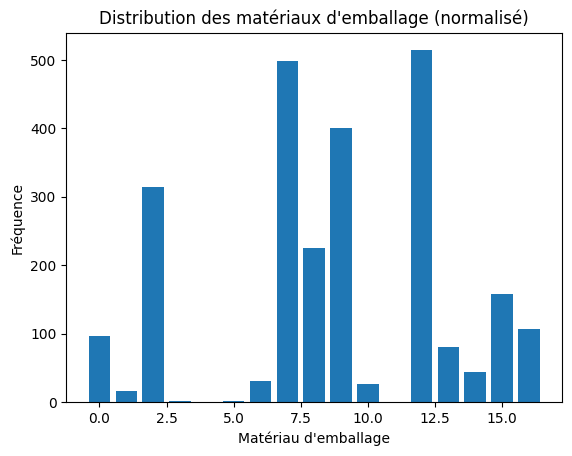

In [68]:
plt.bar(emballage_counts.index, emballage_counts.values)
plt.xlabel('Matériau d\'emballage')
plt.ylabel('Fréquence')
plt.title('Distribution des matériaux d\'emballage (normalisé)')
plt.show()


### 4.2 Fréquence des types d'emballage

Créez une variable contenant les fréquences de chaque type d'emballage dans votre DataFrame dataframe_normalized. Par exemple :

In [69]:
emballage_counts = dataframe_normalized['mat-emballage'].value_counts()


Vous pouvez également calculer la proportion de chaque type d'emballage en divisant les fréquences par le nombre total d'échantillons. Par exemple :

In [70]:
emballage_proportions = dataframe_normalized['mat-emballage'].value_counts(
    normalize=True)


Une fois que vous avez les fréquences ou les proportions, vous pouvez choisir de les visualiser à l'aide de graphiques appropriés. Par exemple, vous pouvez utiliser un diagramme circulaire (pie chart) pour représenter la répartition relative des types d'emballage, ou un diagramme à barres (bar chart) pour afficher les fréquences absolues ou relatives.

Pour créer un diagramme circulaire, vous pouvez utiliser la fonction plt.pie() de Matplotlib. Par exemple :

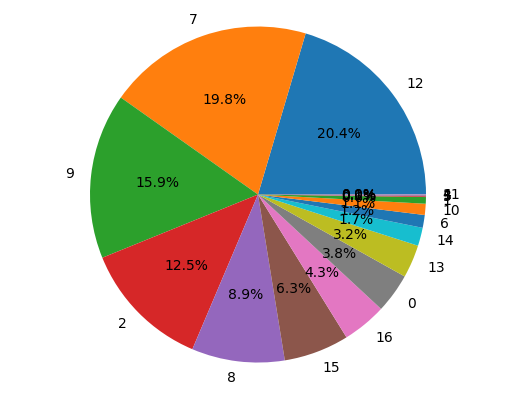

In [71]:
plt.pie(emballage_proportions,
        labels=emballage_proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


Pour créer un diagramme à barres, vous pouvez utiliser la fonction plt.bar() de Matplotlib. Par exemple :

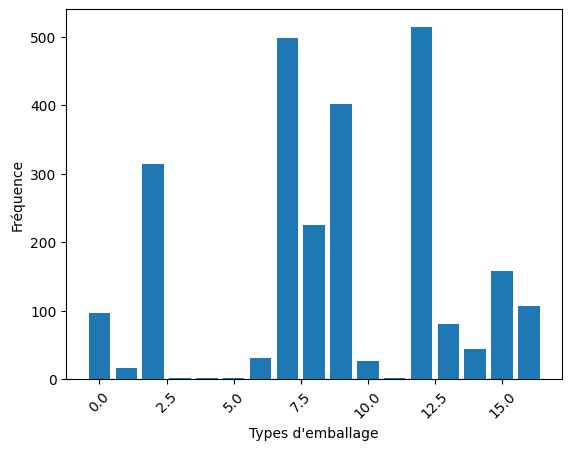

In [72]:
plt.bar(emballage_counts.index, emballage_counts)
plt.xlabel('Types d\'emballage')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()


### 4.3 Relations entre les variables 

Matrice de corrélation : Utilisez la fonction corr() sur votre DataFrame dataframe_normalized pour calculer la matrice de corrélation entre les variables continues. Ensuite, vous pouvez visualiser cette matrice à l'aide de techniques de visualisation comme un heatmap. Voici un exemple de code :

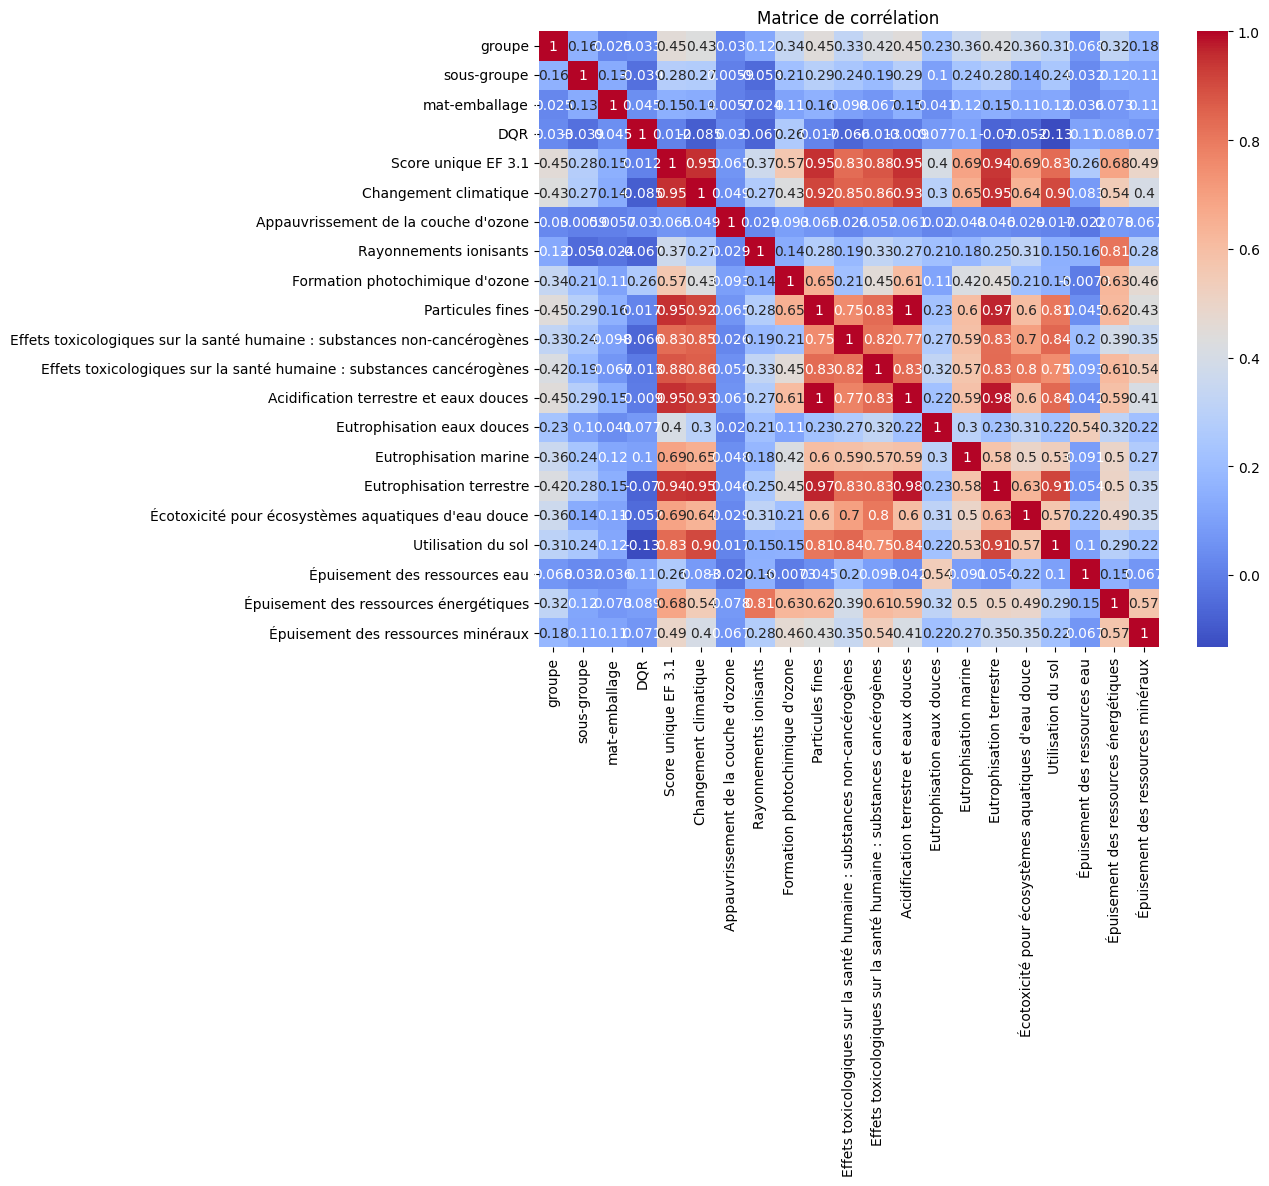

In [74]:
import seaborn as sns
corr_matrix = dataframe_normalized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


Lorsque vous exécutez le code pour créer et afficher la matrice de corrélation à l'aide d'un heatmap, vous obtenez une visualisation qui vous permet d'interpréter les relations linéaires entre les variables continues de votre ensemble de données.

Voici comment interpréter la matrice de corrélation :

- Les carrés colorés dans le heatmap représentent les valeurs de corrélation entre les paires de variables. Les couleurs représentent l'intensité de la corrélation, allant du bleu (corrélation négative) au rouge (corrélation positive).

- Les chiffres à l'intérieur des carrés représentent les coefficients de corrélation. Les valeurs varient de -1 à 1, où -1 indique une corrélation négative parfaite, 0 indique aucune corrélation et 1 indique une corrélation positive parfaite.

- Les carrés diagonaux (en partant du coin supérieur gauche jusqu'au coin inférieur droit) affichent des valeurs de corrélation de 1, ce qui est attendu car ils représentent la corrélation d'une variable avec elle-même.

- Vous pouvez utiliser la légende à côté du heatmap pour interpréter rapidement les couleurs et les valeurs de corrélation associées.

L'interprétation de la matrice de corrélation consiste à identifier les relations linéaires entre les variables continues. Voici quelques points à prendre en compte lors de l'interprétation :

- Les valeurs proches de 1 ou -1 indiquent une corrélation forte entre les variables. Par exemple, une valeur proche de 1 signifie une corrélation positive forte, ce qui suggère que lorsque la valeur d'une variable augmente, l'autre variable a tendance à augmenter également.

- Les valeurs proches de 0 indiquent une corrélation faible ou nulle. Cela signifie qu'il y a peu ou pas de relation linéaire entre les variables.

- Vous pouvez également identifier les paires de variables qui sont fortement corrélées entre elles. Cela peut vous donner des indications sur les variables qui ont une influence similaire sur votre ensemble de données.

En résumé, la matrice de corrélation et le heatmap vous permettent d'observer visuellement les relations linéaires entre les variables continues. Cela peut vous aider à comprendre les dépendances entre les variables et à prendre des décisions éclairées lors de l'analyse de votre ensemble de données.

le code suivant pour extraire les paires de variables qui présentent une corrélation forte (positive ou négative) au-dessus d'un seuil donné :

In [75]:
# Seuil de corrélation
seuil = 0.7

# Extraire les variables fortement corrélées
correlation_pairs = corr_matrix.unstack().sort_values(ascending=False)
strong_correlations = correlation_pairs[(
    correlation_pairs > seuil) & (correlation_pairs < 1)]


In [77]:
print(strong_correlations)

Acidification terrestre et eaux douces                                    Particules fines                                                            0.996659
Particules fines                                                          Acidification terrestre et eaux douces                                      0.996659
Eutrophisation terrestre                                                  Acidification terrestre et eaux douces                                      0.979898
Acidification terrestre et eaux douces                                    Eutrophisation terrestre                                                    0.979898
Eutrophisation terrestre                                                  Particules fines                                                            0.968239
Particules fines                                                          Eutrophisation terrestre                                                    0.968239
                                              

## Etape 5 : Application des algorithmes d'apprentissage (clustering)

In [84]:
# Déterminer le bon nombre de clusters en utilisant l'inertie
inertie_values = []
# Tester différents nombres de clusters (de 1 à 10 par exemple)
k_values = range(1, 100, 5)

for k in k_values:
    Centroides, DictAffect = clust.kmoyennes(
        k, dataframe_normalized, epsilon=0.01, iter_max=100)
    inertie = clust.inertie_globale(dataframe_normalized, DictAffect)
    inertie_values.append(inertie)


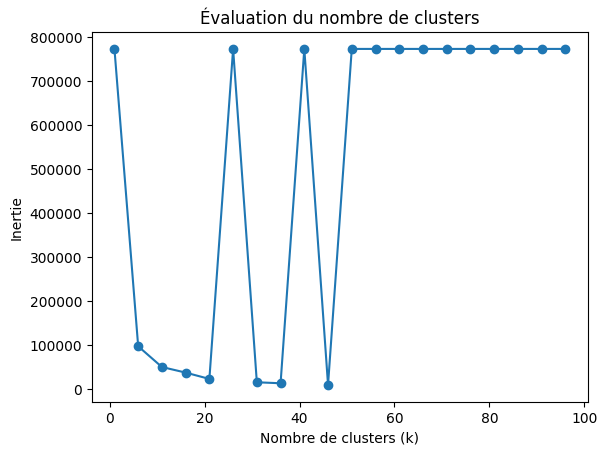

In [85]:
# Afficher le graphique de l'inertie en fonction du nombre de clusters
plt.plot(k_values, inertie_values, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Évaluation du nombre de clusters")
plt.show()


In [88]:
inertie_values = []
k_values = range(40, 60, 1)
min_inertie = float('inf')
best_k = None

for k in k_values:
    Centroides, DictAffect = clust.kmoyennes(
        k, dataframe_normalized, epsilon=0.01, iter_max=100)
    inertie = clust.inertie_globale(dataframe_normalized, DictAffect)
    inertie_values.append(inertie)

    if inertie < min_inertie:
        min_inertie = inertie
        best_k = k

print(
    f"Le nombre optimal de clusters est : {best_k} (avec une inertie minimale de {min_inertie})")


Le nombre optimal de clusters est : 51 (avec une inertie minimale de 8379.086092144407)


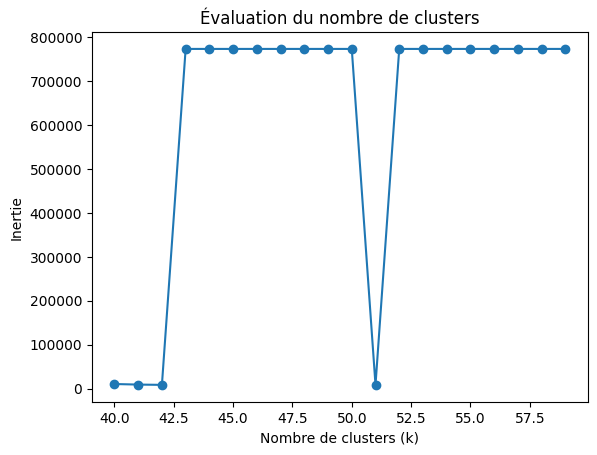

In [89]:
# Afficher le graphique de l'inertie en fonction du nombre de clusters
plt.plot(k_values, inertie_values, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Évaluation du nombre de clusters")
plt.show()


## Etape 6 : Evaluation des performances

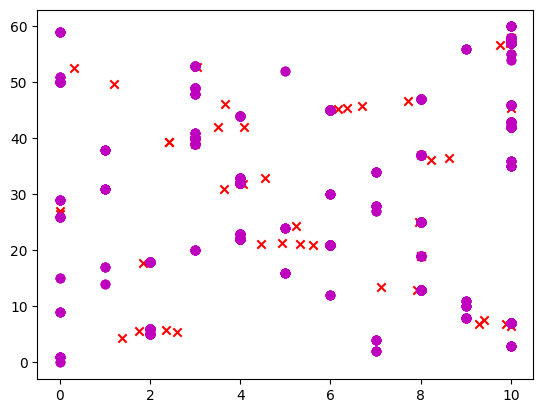

In [93]:
Centroides, DictAffect = clust.kmoyennes(best_k, dataframe_normalized, epsilon=0.01, iter_max=100)

clust.affiche_resultat(dataframe_normalized, Centroides, DictAffect)
plt.show()


j'ai essayé avec standard normalization qu'on a vu dans le cours mais apres les résultats étaient dispersé , donc j'ai pensé a changer la méthode de normalisation j'ai cherché sur google et j'ai trouvé que je peux uliser : standard scaler donc je l'ai essayé 